In [2]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

data=pd.read_csv('C:/Users/acer/Desktop/data vizualisation/Immi_Cana.csv')

data.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

data.rename(columns = {'OdName': 'Pays', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True) 

data.set_index('Pays',inplace=True) 

data.columns = list(map(str,data.columns))

data['Total'] = data.sum(axis=1) 

annee = list(map(str, range(1980, 2014)))


data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pays,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [3]:
#Verification de la version du Matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.3.4


(-1.1342710063763075,
 1.122857780182264,
 -1.1303747618531514,
 1.1014464172311025)

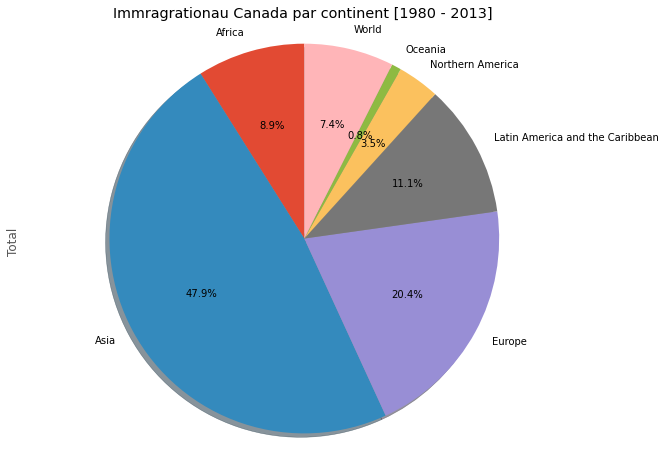

In [4]:
#Realisation du diagramme en camenbert

#Recuperons les donnees par continent
df_continents = data.groupby("Continent", axis=0).sum()
df_continents

df_continents['Total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, figsize=(10,8)) 
plt.title('Immragrationau Canada par continent [1980 - 2013]')
plt.axis('equal')

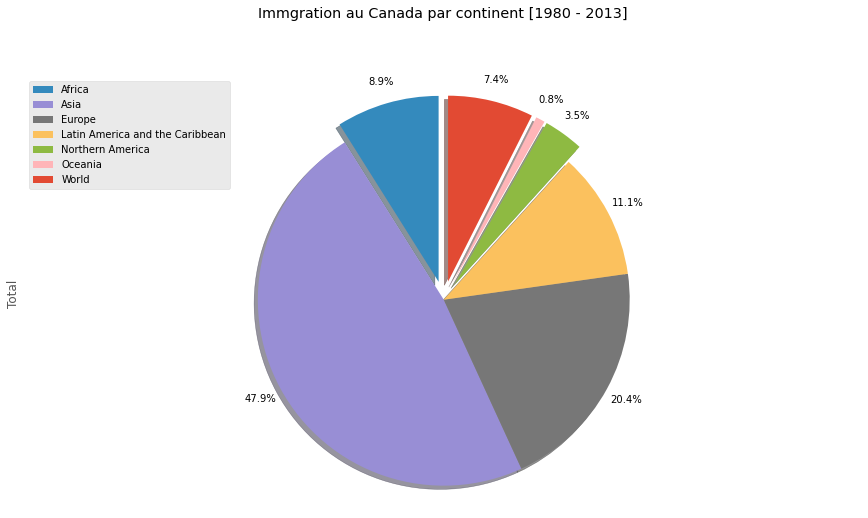

In [5]:
#Le diagramme precedent n'est pas claire, les chiffre se chevauche. Quelques modification utile pour une bonne representation

colors_list = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0.1] 

df_continents['Total'].plot(kind='pie',
                            figsize=(15,8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # cache les étiquettes sur le diagramme
                            pctdistance=1.12,    # the ratio entre centre de chaque secteur et le text generé par autopct 
                            colors=colors_list,  # add custom colors
                            explode= explode_list  ##'exploser' ## les 4 plus petit
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immgration au Canada par continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


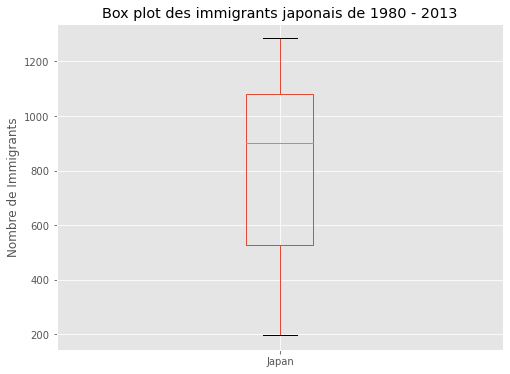

In [6]:
#LE BOXPLOT
#Un box plot est une représentation statistique de la distribution d'une variable continue a travers 5 dimensions principales.
#Pour réaliser un box plot, nous pouvons utiliser kind=box dans la méthode plot invoquée sur une série ou un dataframe pandas.

#Traçons le box plot pour les immigrants japonais entre 1980 et 2013.
#REPURONS LES DONNEES PAR JAPON
df_japon = data.loc[['Japan'],annee].transpose()
df_japon.head()

#REPRESENTATION
df_japon.plot(kind='box', figsize=(8, 6))

plt.title('Box plot des immigrants japonais de 1980 - 2013') 
plt.ylabel('Nombre de Immigrants') 
plt.show()

In [7]:
# Utiliser la fonction decribe pour vérifier votre box plot
df_japon.describe()

Pays,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [19]:
df_CI=data.loc[['China', 'India'], annee].transpose()

df_CI



Pays,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


In [20]:
df_CI.describe()

Pays,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


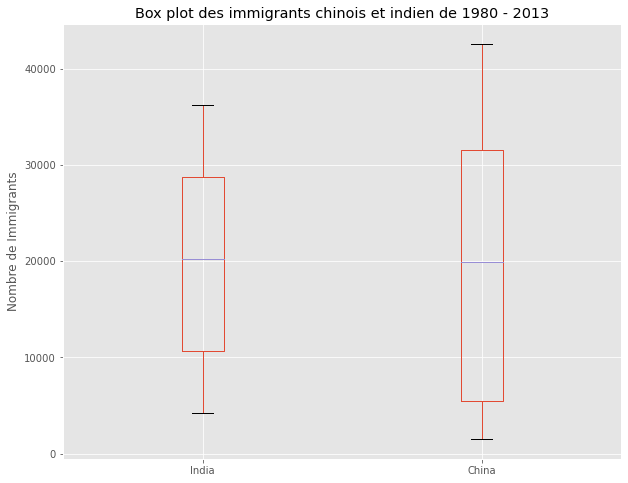

In [8]:
#Comparaison des pays a l'aide la boite de moustache ou boxplot
#exemple de china et India

#recuperons les données de ces deux pays
df_china_india = data.loc[['India','China'],annee].transpose()
df_china_india.head()

#Representation 
df_china_india.plot(kind='box', figsize=(10, 8))

plt.title('Box plot des immigrants chinois et indien de 1980 - 2013') 
plt.ylabel('Nombre de Immigrants') 
plt.show()

In [9]:
df_china_india.describe()

Pays,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


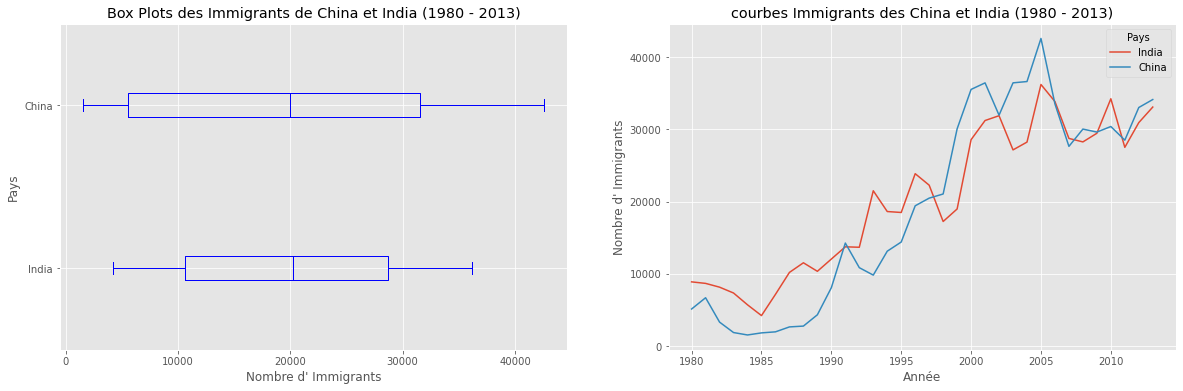

In [10]:
#Representer plusieurs graphes sur une même figure 

fig = plt.figure() # creer figure

ax0 = fig.add_subplot(1, 2, 1) # ajouter subplot 1 (1 ligne, 2 col, 1er plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 ligne, 2 col, 2e plot). **

# Subplot 1: Box plot
df_china_india.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # ajouter a subplot 1
ax0.set_title('Box Plots des Immigrants de China et India (1980 - 2013)')
ax0.set_xlabel('Nombre d\' Immigrants')
ax0.set_ylabel('Pays')

# Subplot 2: Line plot
df_china_india.plot(kind='line', figsize=(20, 6), ax=ax1) # ajouter a subplot 2
ax1.set_title ('courbes Immigrants des China et India (1980 - 2013)')
ax1.set_ylabel('Nombre d\' Immigrants')
ax1.set_xlabel('Année')

plt.show()

In [11]:
#Representation du diagramme de Gauffre pour les pays suivants: Danmark, Norway and Sweden. Visulisation aproffondie
#Cela se fera en 7 partie neccessaires et indispensables 

#Creyons un DataFrame avec ces trois pays: Danmark, Norway and Sweden
Df_dns=data.loc[['Denmark','Norway','Sweden'], :]
Df_dns



,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pays,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [12]:
# La 1ere étape consiste à déterminer la proportion de chaque catégorie par rapport au Total
total_values = sum(Df_dns['Total'])
category_proportions = [(float(value) / total_values) for value in Df_dns['Total']]

# afficher les proportions
for i, proportion in enumerate(category_proportions):
    print (Df_dns.index.values[i] + ': ' + str(proportion))

#2eme etape 
# Definir la taille du Gaufre
largeur = 40 # largeur de la gaufre
longueur = 10 # longeur de la gaufre

total_tuiles = largeur * longueur # nombre de tuiles total

print ('Le Nombre Total de tuiles est ', total_tuiles)


#3etpe
# Calcul du nombre de tuiles de chaque catégorie
tiles_per_category = [round(proportion * total_tuiles) for proportion in category_proportions]
 
# Afficher le nombre de tuiles par categorie
for i, tiles in enumerate(tiles_per_category):
    print (Df_dns.index.values[i] + ': ' + str(tiles))


#4eme etape 

print ('Diagramme en gaufre rempli')

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744
Le Nombre Total de tuiles est  400
Denmark: 129
Norway: 77
Sweden: 194
Diagramme en gaufre rempli


In [13]:
# initialiser le diagramme en gaufre comme une matrice vide
waffle_chart = np.zeros((longueur, largeur))
 
# definir les index à incrémenter dans les boucles
category_index = 0
tile_index = 0
 
# remplir la gaufre
for col in range(largeur):
    for row in range(longueur):
        tile_index += 1
 
        # si les nombre de tuiles remplies pour la catégorie en cours est égale au nombre de tuile allouées
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        waffle_chart[row, col] = category_index 
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # on en besoin pour waffle Charts

mpl.style.use('ggplot') # optionelle: pour ggplot-like style

# voir la version de Matplotlib
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.3.4


<Figure size 432x288 with 0 Axes>

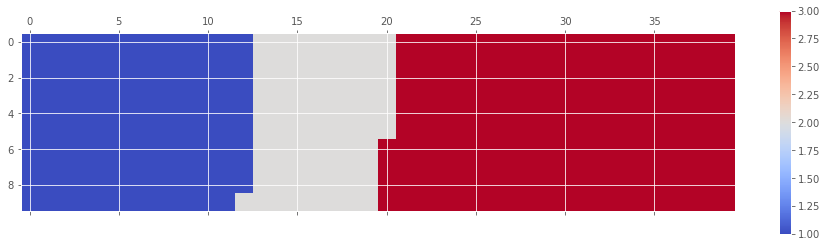

In [15]:
#5eme etape : Transfformer lamatrice en un visuel

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

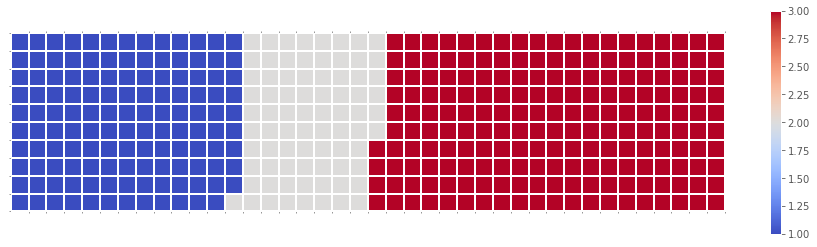

In [16]:
#6eme etape : embellir notre Gaufre

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(.5, (largeur), 1), minor=True)
ax.set_yticks(np.arange(-.5, (longueur), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.savefig('waffle.png')

<Figure size 432x288 with 0 Axes>

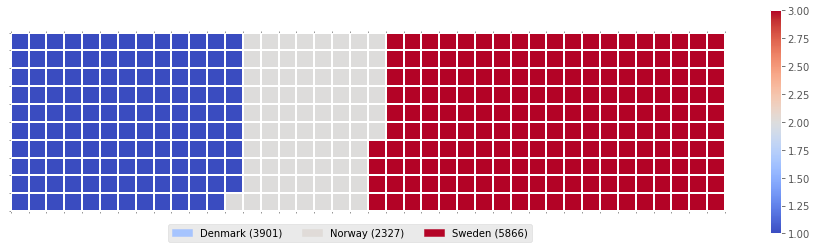

In [17]:
#7eme etape : Ajouter une legendre

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (largeur), 1), minor=True)
ax.set_yticks(np.arange(-.5, (longueur), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(Df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(Df_dns.index.values):
    label_str = category + ' (' + str(Df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(Df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.savefig('waffle.png')

In [29]:
df_top15 = data.sort_values('Total', ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pays,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,World,44000,18078,16904,13635,14855,14368,13303,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [33]:
an_80 = list(map(str, range(1980,1990)))
an_90 = list(map(str, range(1990,2000)))
an_00 = list(map(str, range(2000,2010)))


In [36]:
df_80 = df_top15[an_80].sum(axis=1)
df_90 = df_top15[an_90].sum(axis=1)
df_00 = df_top15[an_00].sum(axis=1)

In [39]:
new_df = pd.DataFrame({'1980':df_80, '1990':df_90, '2000':df_00})
new_df

,1980,1990,2000
Pays,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Unknown,201844,249985,53780
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678


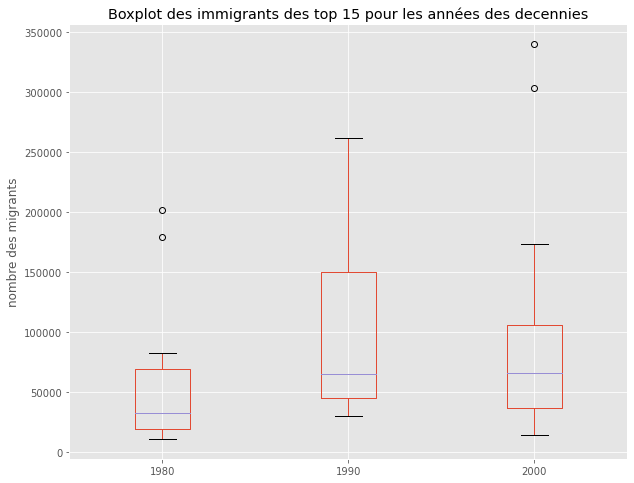

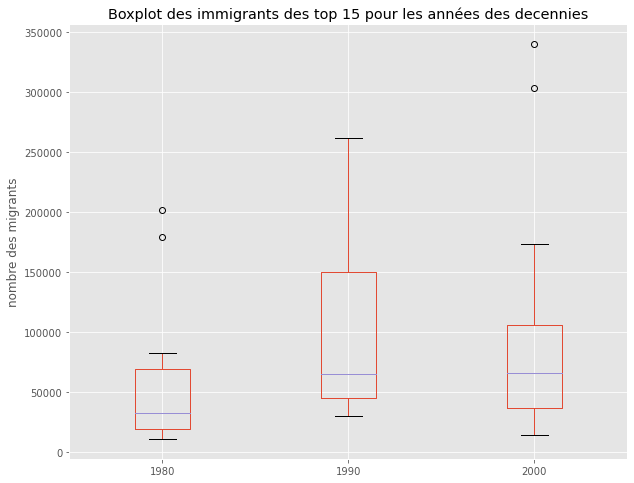

In [43]:
new_df.plot(kind='box', figsize=(10,8))
plt.title('Boxplot des immigrants des top 15 pour les années des decennies')
plt.ylabel('nombre des migrants')
plt.show(())

In [44]:
new_df.describe()

,1980,1990,2000
count,15.000000,15.000000,15.000000
mean,57367.066667,100016.400000,98022.533333
std,58707.863270,78556.702512,100300.494326
min,10591.000000,30028.000000,13629.000000
25%,19307.000000,44787.000000,36101.500000
50%,32003.000000,64864.000000,65794.000000
75%,68794.000000,150005.000000,105505.500000
max,201844.000000,261966.000000,340385.000000
